### 1.0 ETL ###

- *Importacion de librerias*

In [65]:
import pandas as pd
import ast
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
import json
import warnings
warnings.filterwarnings("ignore")
from fastapi import FastAPI
from wordcloud import WordCloud

1.1 *Carga de datasests*

*Se cargaran solo las primeras 500 filas de los dataset para evitar la saturacion de la memoria*

In [2]:
df_movies = pd.read_csv(r'C:\Users\Rocio\Desktop\Movies\movies_dataset.csv', nrows=500)
df_credits = pd.read_csv(r'C:\Users\Rocio\Desktop\Movies\credits.csv', nrows=500)

In [3]:
df_movies.head(2)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413


In [4]:
df_credits

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862
...,...,...,...
495,"[{'cast_id': 20, 'character': 'Daniel Hillard ...","[{'credit_id': '52fe4276c3a36847f802094b', 'de...",788
496,"[{'cast_id': 1, 'character': 'Johnny', 'credit...","[{'credit_id': '56dff56ec3a368748e0035ea', 'de...",21450
497,"[{'cast_id': 1, 'character': 'Sgt. Kesuke Miya...","[{'credit_id': '52fe44169251416c75028661', 'de...",11231
498,"[{'cast_id': 1, 'character': 'Peter Witner', '...","[{'credit_id': '52fe45d4c3a36847f80dccbd', 'de...",41588


*2.0 TRANSFORMACION*

- *Se eliminan duplicados si es que existen*

In [5]:
df_movies= df_movies.drop_duplicates()

- *Segun la concigna se proceden a eliminar las columnas que no serán utilizadas, video,imdb_id,adult,original_title,poster_path y homepage.*

In [6]:
df_movies = df_movies.drop(['video', 'imdb_id', 'adult', 'original_title', 'poster_path', 'homepage'], axis=1)


- *Se corrobora la informacion del df*

In [7]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   belongs_to_collection  74 non-null     object 
 1   budget                 500 non-null    int64  
 2   genres                 500 non-null    object 
 3   id                     500 non-null    int64  
 4   original_language      500 non-null    object 
 5   overview               498 non-null    object 
 6   popularity             500 non-null    float64
 7   production_companies   500 non-null    object 
 8   production_countries   500 non-null    object 
 9   release_date           500 non-null    object 
 10  revenue                500 non-null    int64  
 11  runtime                500 non-null    float64
 12  spoken_languages       500 non-null    object 
 13  status                 499 non-null    object 
 14  tagline                389 non-null    object 
 15  title 

- *"Luego de corroborar la informacion del df se distingue que:*
 
- *la columna belongs_to_colection tiene una gran cantidad de nulls al igual que tagline, por lo tanto se procede a eliminar dichas columnas.*
 
- *la columna overview solo tiene dos nulls y la columna status solo uno , al ser de tipo object tambien se eliminaran esas tres filas ya que cosidera que no sera una perdida significativa para el dataset"*

In [8]:
df_movies = df_movies.drop(columns=['tagline', 'belongs_to_collection'])


In [9]:
df_movies.dropna(subset=['status', 'overview'],inplace= True)

In [10]:
print(df_movies.isnull().sum())


budget                  0
genres                  0
id                      0
original_language       0
overview                0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
title                   0
vote_average            0
vote_count              0
dtype: int64


- *Se cambia el formato de la columna release_date de object a datetime AAAA-mm-dd*

In [11]:
df_movies['release_date'] = pd.to_datetime(df_movies['release_date'],format='%Y-%m-%d', errors='coerce')

- *Se crea la columna release_year donde se extraerán el año de la fecha de estreno.*

In [12]:
df_movies['release_year'] = df_movies['release_date'].dt.year

-*Los valores nulos de los campos revenue, budget son rellenados por el número 0.*

In [13]:
df_movies.fillna({'revenue': 0, 'budget': 0}, inplace=True)

In [14]:
df_movies['budget']

0      30000000
1      65000000
2             0
3      16000000
4             0
         ...   
495    25000000
496           0
497    12000000
498           0
499    20000000
Name: budget, Length: 497, dtype: int64

- *Se cambia el tipo de dato de la columna budget de object a int*

In [15]:
df_movies['budget'] = df_movies['budget'].astype(int)

- *Se crea la columna return con el retorno de inversión, a partir de los campos revenue y budget, dividiendo estas dos últimas revenue / budget.*



In [16]:
df_movies['return']= df_movies['revenue']/ df_movies['budget']

- *Se corroboran los null de la columna return*

In [17]:
print(df_movies['return'].isnull().sum())

207


- *Se remplazan los valores nulos por "0".*

In [18]:
df_movies.fillna({'return' : 0 }, inplace=True)

In [19]:
df_movies['return'].head()

0    12.451801
1     4.043035
2     0.000000
3     5.090760
4          inf
Name: return, dtype: float64

- *"La fila 4 de la columna return contiene inf, a pesar de que su tipo de dato es float. Se elimina.* 

In [20]:
df_movies.drop(index=4, inplace=True)

- *Se busca desanidar genres con la vision de utilizar estos datos mas adelante en el sistema de recomendacion*


- *Se crea la funcion "desanidar_generos" para desanidar la columna genres con los argumentos df, correspondiente al dataframe, y columna, refiriendose a la columna que se ira a desanidar".*


In [21]:

def desanidar_generos(df, columna):
    """
    Recibe como parametros el df y la columna a desanidar
    itera sobre esta intentando convertir los valores a formato json 
    reemplazando ' por " almacena el índice original y los valores de cada género 
    manejando correctamente los errores. Finalmente crea un df con las desanidadas
    y convierte el valor de la columna en una lista de diccionarios
    """
    
    filas_generos = []
    indices = []
    
    for i, valor in df[columna].items():  
        
        try:
            generos = json.loads(valor.replace("'", "\""))
            for genero in generos:
                # Almacena el índice original y los valores de cada género
                indices.append(i)
                filas_generos.append(genero)
        except (TypeError, json.JSONDecodeError):
            # Sino puede convertirlo, continúa
            continue

    # Crea un DataFrame con las filas desanidadas
    df_generos = pd.DataFrame(filas_generos)
    df_generos['indice_original'] = indices  # Agrega los índices originales
    return df_generos



- *Se aplica la funcion*

In [22]:
generos_desanidados = desanidar_generos(df_movies, 'genres')

print(generos_desanidados)

         id             name  indice_original
0        16        Animation                0
1        35           Comedy                0
2     10751           Family                0
3        12        Adventure                1
4        14          Fantasy                1
...     ...              ...              ...
1205     18            Drama              498
1206     28           Action              499
1207     18            Drama              499
1208    878  Science Fiction              499
1209     53         Thriller              499

[1210 rows x 3 columns]


- *Se agrupa el df generos_desanidados en una lista por id y name*

In [23]:
generos_desanidados = generos_desanidados.groupby('id')['name'].apply(list).reset_index()

print(generos_desanidados)

       id                                               name
0      12  [Adventure, Adventure, Adventure, Adventure, A...
1      14  [Fantasy, Fantasy, Fantasy, Fantasy, Fantasy, ...
2      16  [Animation, Animation, Animation, Animation, A...
3      18  [Drama, Drama, Drama, Drama, Drama, Drama, Dra...
4      27  [Horror, Horror, Horror, Horror, Horror, Horro...
5      28  [Action, Action, Action, Action, Action, Actio...
6      35  [Comedy, Comedy, Comedy, Comedy, Comedy, Comed...
7      36  [History, History, History, History, History, ...
8      37  [Western, Western, Western, Western, Western, ...
9      53  [Thriller, Thriller, Thriller, Thriller, Thril...
10     80  [Crime, Crime, Crime, Crime, Crime, Crime, Cri...
11     99  [Documentary, Documentary, Documentary, Docume...
12    878  [Science Fiction, Science Fiction, Science Fic...
13   9648  [Mystery, Mystery, Mystery, Mystery, Mystery, ...
14  10402  [Music, Music, Music, Music, Music, Music, Mus...
15  10749  [Romance, Rom

- *Se eliminan los duplicados y se expande el df con una fila para cada nombre de la lista de generos, para luego utilizar One-Hot-Encoding.*

In [24]:
generos_desanidados['name'] = generos_desanidados['name'].apply(lambda x: list(set(x)))
df_xpld_gen= generos_desanidados.explode('name')

#One-Hot Encoding
df_ohe = pd.get_dummies(df_xpld_gen, columns=['name'])

#Se agrupa por id y se suma los valores para reconstruir la información de cada película
df_ohe_group = df_ohe.groupby('id').sum()
print(df_ohe_group)


       name_Action  name_Adventure  name_Animation  name_Comedy  name_Crime  \
id                                                                            
12               0               1               0            0           0   
14               0               0               0            0           0   
16               0               0               1            0           0   
18               0               0               0            0           0   
27               0               0               0            0           0   
28               1               0               0            0           0   
35               0               0               0            1           0   
36               0               0               0            0           0   
37               0               0               0            0           0   
53               0               0               0            0           0   
80               0               0               0  

3.0 EDA *(seleccion de datos)*

*Se cambia el tipo de dato de las columnas id y popularity*

In [25]:
df_movies['id'] = df_movies['id'].astype(int)
df_movies['popularity'] = df_movies['popularity'].astype(float)


### Credits ###

In [26]:
df_credits

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862
...,...,...,...
495,"[{'cast_id': 20, 'character': 'Daniel Hillard ...","[{'credit_id': '52fe4276c3a36847f802094b', 'de...",788
496,"[{'cast_id': 1, 'character': 'Johnny', 'credit...","[{'credit_id': '56dff56ec3a368748e0035ea', 'de...",21450
497,"[{'cast_id': 1, 'character': 'Sgt. Kesuke Miya...","[{'credit_id': '52fe44169251416c75028661', 'de...",11231
498,"[{'cast_id': 1, 'character': 'Peter Witner', '...","[{'credit_id': '52fe45d4c3a36847f80dccbd', 'de...",41588


- *Se observa la primera fila de la columna cast'*

In [27]:
df_credits['cast'].iloc[0]

"[{'cast_id': 14, 'character': 'Woody (voice)', 'credit_id': '52fe4284c3a36847f8024f95', 'gender': 2, 'id': 31, 'name': 'Tom Hanks', 'order': 0, 'profile_path': '/pQFoyx7rp09CJTAb932F2g8Nlho.jpg'}, {'cast_id': 15, 'character': 'Buzz Lightyear (voice)', 'credit_id': '52fe4284c3a36847f8024f99', 'gender': 2, 'id': 12898, 'name': 'Tim Allen', 'order': 1, 'profile_path': '/uX2xVf6pMmPepxnvFWyBtjexzgY.jpg'}, {'cast_id': 16, 'character': 'Mr. Potato Head (voice)', 'credit_id': '52fe4284c3a36847f8024f9d', 'gender': 2, 'id': 7167, 'name': 'Don Rickles', 'order': 2, 'profile_path': '/h5BcaDMPRVLHLDzbQavec4xfSdt.jpg'}, {'cast_id': 17, 'character': 'Slinky Dog (voice)', 'credit_id': '52fe4284c3a36847f8024fa1', 'gender': 2, 'id': 12899, 'name': 'Jim Varney', 'order': 3, 'profile_path': '/eIo2jVVXYgjDtaHoF19Ll9vtW7h.jpg'}, {'cast_id': 18, 'character': 'Rex (voice)', 'credit_id': '52fe4284c3a36847f8024fa5', 'gender': 2, 'id': 12900, 'name': 'Wallace Shawn', 'order': 4, 'profile_path': '/oGE6JqPP2xH4t

- *Se crea la funcion desanidar_col que en primera instancia intenta convertir la columna a formato json utilizando el metodo json .loads reemplazando ' por ". si el valor no es valido o no es una lista o diccionario devuelve una lista vacia.*
- *A continuacion se aplica la funcion eval_format*
- *Luego se  expanden las filas con el metodo explode y se resetean los indices*
- *Si los valores son validos, desanida las claves del diccionario*
- *Combina las columnas desanidadas con el resto del df*
- *Para finalizar retorna un nuevo df con los datos originales desanidados.*

In [28]:
def desanidar_col(df, col_name, prefix_col):
    """
         - df: DataFrame donde está la columna a desanidar.
        - col_name: Nombre de la columna.
        - prefix_col: Prefijo que tendrán las columnas generadas al desanidar col_name.para evitar la confusion con el id del df
    """
    def eval_format(x):
        try:
            if isinstance(x, str):
                return json.loads(x.replace("'", '"'))
        except (json.JSONDecodeError, ValueError):
            try:
                return ast.literal_eval(x)
            except (ValueError, SyntaxError):
                return []
        return []

    # Convierte strings mal formateados a listas/diccionarios
    df[col_name] = df[col_name].apply(eval_format)

    # Expande filas con listas de diccionarios
    desanidar_data = df.explode(col_name).reset_index(drop=True)

    # Si los valores son válidos, desanida las claves del diccionario
    if desanidar_data[col_name].notnull().any():
        # Normaliza los diccionarios en columnas
        desanidar_keys = pd.json_normalize(desanidar_data[col_name])
        desanidar_keys.columns = [f"{prefix_col}_{col}" for col in desanidar_keys.columns]
        
        # Combina las columnas desanidadas con el resto del DataFrame
        desanidar_data = pd.concat([desanidar_data.drop(columns=[col_name]), desanidar_keys], axis=1)

    return desanidar_data


-*Se aplica la funcion a la columna cast y a la columna crew del dataframe df_credits*

In [29]:
cast_df = desanidar_col(df_credits, "cast", "cast")
crew_df = desanidar_col(df_credits, "crew", "crew")


In [30]:
cast_df.head(2)

,crew,id,cast_cast_id,cast_character,cast_credit_id,cast_gender,cast_id,cast_name,cast_order,cast_profile_path
0,"[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862,14.0,Woody (voice),52fe4284c3a36847f8024f95,2.0,31.0,Tom Hanks,0.0,/pQFoyx7rp09CJTAb932F2g8Nlho.jpg
1,"[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862,15.0,Buzz Lightyear (voice),52fe4284c3a36847f8024f99,2.0,12898.0,Tim Allen,1.0,/uX2xVf6pMmPepxnvFWyBtjexzgY.jpg


In [31]:
cast_df.drop('crew', axis=1, inplace=True)
crew_df.drop('cast', axis=1, inplace=True)

In [32]:
crew_df.rename(columns={'id': 'id_miembro'}, inplace=True)


In [33]:
crew_df.head()

,id_miembro,crew_credit_id,crew_department,crew_gender,crew_id,crew_job,crew_name,crew_profile_path
0,862,52fe4284c3a36847f8024f49,Directing,2.0,7879.0,Director,John Lasseter,/7EdqiNbr4FRjIhKHyPPdFfEEEFG.jpg
1,862,52fe4284c3a36847f8024f4f,Writing,2.0,12891.0,Screenplay,Joss Whedon,/dTiVsuaTVTeGmvkhcyJvKp2A5kr.jpg
2,862,52fe4284c3a36847f8024f55,Writing,2.0,7.0,Screenplay,Andrew Stanton,/pvQWsu0qc8JFQhMVJkTHuexUAa1.jpg
3,862,52fe4284c3a36847f8024f5b,Writing,2.0,12892.0,Screenplay,Joel Cohen,/dAubAiZcvKFbboWlj7oXOkZnTSu.jpg
4,862,52fe4284c3a36847f8024f61,Writing,0.0,12893.0,Screenplay,Alec Sokolow,/v79vlRYi94BZUQnkkyznbGUZLjT.jpg


In [34]:
df_movies.head(2)

,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,release_year,return
0,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Toy Story,7.7,5415,1995,12.451801
1,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,en,When siblings Judy and Peter discover an encha...,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Jumanji,6.9,2413,1995,4.043035


### *Se seleccionan los datos de los df para comenzar a crear las funciones pedidas* ###

- *Se crean las columnas dia y mes con los datos de la columna release_date del df original df_movies*

In [35]:
df_movies['dia'] = df_movies['release_date'].dt.day
df_movies['mes'] = df_movies['release_date'].dt.month

- *Se crea el df_cantidad con las columnas status, mes, dia. Este dataframe será utilizado para las funciones contar_peliculas_por_mes y cantidad_filmaciones_dia*

In [36]:
df_cantidad = df_movies[['status','mes','dia']]

In [37]:
df_cantidad

,status,mes,dia
0,Released,10,30
1,Released,12,15
2,Released,12,22
3,Released,12,22
5,Released,12,15
...,...,...,...
495,Released,11,24
496,Released,9,14
497,Released,7,18
498,Released,9,16


- *Se exporta el df_cantidad como un archivo csc bajo el nombre 'dataset_cantidad.csv'*

In [38]:
df_cantidad.to_csv('dataset_cantidad.csv', index=False)

- *Se crea la funcion contar_peliculas_por_mes, la cual recibe como parametro un input con el nombre del mes (str).*
- *Esta funcion cuenta con un diccionario con los nombre de los meses como key y se asigna un numero como clave.*
- *En primera instancia convierte el nombre del mes recibido en minuscula y procede a mapear el diccionario meses_dict. Si el input no es valido devuelve un mensaje de error*
- *Luego filtra el df_cantidad por el mes y el estado de la pelicula, si esta coincide lo guarda en la variable peliculas_estrenadas*
- *Finalmente devuelve el conteo de las peliculas estrenadas en el mes recibido*

In [39]:
def contar_peliculas_por_mes(mes):
    meses_dict = {
        'enero': 1,
        'febrero': 2,
        'marzo': 3,
        'abril': 4,
        'mayo': 5,
        'junio': 6,
        'julio': 7,
        'agosto': 8,
        'septiembre': 9,
        'octubre': 10,
        'noviembre': 11,
        'diciembre': 12
    }
    
    mes_numero = meses_dict.get(mes.lower())
    
    if mes_numero is None:
        return "Mes no válido. Por favor, ingresa un mes válido en español."
    
    peliculas_estrenadas = df_cantidad[(df_cantidad['mes'] == mes_numero) & (df_cantidad['status'] == 'Released')]

    return len(peliculas_estrenadas)


- *Se prueba la funcion*

In [40]:
mes_input = input("Ingresa el nombre de un mes: ")
cantidad_peliculas = contar_peliculas_por_mes(mes_input)
print(f"Cantidad de películas estrenadas en {mes_input}: {cantidad_peliculas}")

Cantidad de películas estrenadas en enero: 41


- *Se crea la funcion cantidad_filmaciones_dia que recibe como parametro el nombre de un dia. Esta funcion tambien utiliza el df_cantidad*
- *Contiene un diccionario dias_dict con los nombres de los dias como key y como clave se le asigna un numero que coincide con la columna mes del df_cantidad*
- *Se utiliza el metodo get para obtener el valor del diccionario que corresponde al dia ingresado y se transforma el input en minuscula para que coincida con el diccionario*
- *Si el dia no se encuentra se arroja un mensaje de error*
- *Finalmente aloja en la variable peliculas_estrenadas aquellas peliculas que coincidan con el dia y su estado sea released y luego retorna la cantidad de peliculas estrenadas ese dia de la semana*

In [41]:
'''cantidad de filmaciones estrenadas en un dia de la semana '''
def cantidad_filmaciones_dia(dia):
    dias_dict = {
        'domingo': 1,
        'lunes': 2,
        'martes': 3,
        'miercoles': 4,
        'jueves': 5,
        'viernes': 6,
        'sabado': 7
    }
    
    numero_dia = dias_dict.get(dia.lower())
    if numero_dia is None:
        return "Dia no válido. Por favor, ingresa un dia válido en español."
    peliculas_estrenadas = df_cantidad[(df_cantidad['dia'] == numero_dia) & (df_cantidad['status'] == 'Released')]
    return len(peliculas_estrenadas)

-*Prueba de la funcion*l

In [64]:
dia_input = input("Ingresa el nombre de un dia: ")
cantidad_peliculas = cantidad_filmaciones_dia(dia_input)
print(f"Cantidad de películas estrenadas en {dia_input}: {cantidad_peliculas}")

Cantidad de películas estrenadas en lunes: 9


- *Se crea el dataframe df_score_titulo con las columnas title.release_year y popularity del df original df_movies. Para la funcion score_titulo*
- *Se exporta en un archivo csv bajo el nombre 'dataset_score_title.csv'*

In [43]:
df_score_titulo = df_movies[['title','release_year','popularity']] 
df_score_titulo.to_csv('dataset_score_title.csv', index=False)

- *La funcion score_titulo reecibe como parametro el nombre del titulo de la filmacion*
- *En la variable pelicula guarda el resultado de la coincidencia luego de convertir el input recibido y los datos en la columna title en minuscula. Si el titulo ingresado es incorrecto o esta vacio devuelve un mensaje de error.*
- *Extrae los unicos valores almacenados en pelicula y los renombra como titulo, anio_estreno y score*
- *Finalmente retorna el mensaje con el titulo de la pelicula, elaño que fue estrenada y la popularidad de la misma*

In [44]:
def score_titulo(titulo_de_la_filmacion):
    pelicula = df_score_titulo[df_score_titulo['title'].str.lower() == titulo_de_la_filmacion.lower()]
    if pelicula.empty:
        return "El título ingresado no se encuentra en la base de datos."
    
    titulo = pelicula['title'].iloc[0]
    anio_estreno = pelicula['release_year'].iloc[0]
    score = pelicula['popularity'].iloc[0]
    print(pelicula)
    return f"La película '{titulo}' fue estrenada en el año {anio_estreno} con un score/popularidad de {score}."


- *Prueba de la funcion*

In [45]:
titulo = input("Ingresa el título de una filmación: ")
resultado = score_titulo(titulo)
print(resultado)

       title  release_year  popularity
0  Toy Story          1995   21.946943
La película 'Toy Story' fue estrenada en el año 1995 con un score/popularidad de 21.946943.


- *Se crea el dataframe df_votos con las columnas title,vote_average y vote acount del df original df_movies.*
- *Se importa el df_votos como un archivo csv con el nombre de dataset_votos.csv.*

In [46]:
df_votos = df_movies[['title','vote_average','vote_count']]
df_votos.to_csv('dataset_votos.csv', index=False)

- *La funcion votos_titulo recibe como parametro el nombre del titulo de la filmacion*
- *Filtra el dataframe, convierte a minuscula el titulodel df y el input para buscar coincidencia y guardarla la variable pelicula Si el titulo ingresado es incorrecto o esta vacio devuelve un mensaje de error.*
- *Extrae los unicos valores almacenados en pelicula y los renombra como titulo, cantidad_votos y promedio_votos*
- *Verifica si la cantidad de votos de la pelicula es mayor a 2000. Si no cumple la condicion retorna un mensaje sobre la falta de cumplimiento del requisito y la cantidad de votos de la pelicula.*
- *Finalmente retorna el mensaje con el titulo de la pelicula, el año que fue estrenada y la popularidad de la misma*

In [47]:
'''Funcion titulo de la filmacion '''

def votos_titulo(titulo_de_la_filmacion):
    
    pelicula = df_votos[df_votos['title'].str.lower() == titulo_de_la_filmacion.lower()]
    if pelicula.empty:
        return "El título ingresado no se encuentra en la base de datos."
    
    titulo = pelicula['title'].iloc[0]
    cantidad_votos = pelicula['vote_count'].iloc[0]
    promedio_votos = pelicula['vote_average'].iloc[0]
    
    if cantidad_votos < 2000:
        return f"La película '{titulo}' no cumple con el requisito mínimo de 2000 valoraciones (tiene {cantidad_votos} valoraciones)."
    
    return f"La película '{titulo}' cuenta con un total de {cantidad_votos} valoraciones, con un promedio de {promedio_votos:.2f}."


*Prueba de la funcion*

In [48]:
titulo = input("Ingresa el título de una filmación: ")
resultado = votos_titulo(titulo)
print(resultado)

La película 'Toy Story' cuenta con un total de 5415 valoraciones, con un promedio de 7.70.


In [49]:
df_movies.head()

,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,release_year,return,dia,mes
0,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Toy Story,7.7,5415,1995,12.451801,30,10
1,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,en,When siblings Judy and Peter discover an encha...,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Jumanji,6.9,2413,1995,4.043035,15,12
2,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,en,A family wedding reignites the ancient feud be...,11.712900,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Grumpier Old Men,6.5,92,1995,0.000000,22,12
3,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Waiting to Exhale,6.1,34,1995,5.090760,22,12
5,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",949,en,"Obsessive master thief, Neil McCauley leads a ...",17.924927,"[{'name': 'Regency Enterprises', 'id': 508}, {...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,187436818,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Heat,7.7,1886,1995,3.123947,15,12


In [50]:
cast_df.head()

,id,cast_cast_id,cast_character,cast_credit_id,cast_gender,cast_id,cast_name,cast_order,cast_profile_path
0,862,14.0,Woody (voice),52fe4284c3a36847f8024f95,2.0,31.0,Tom Hanks,0.0,/pQFoyx7rp09CJTAb932F2g8Nlho.jpg
1,862,15.0,Buzz Lightyear (voice),52fe4284c3a36847f8024f99,2.0,12898.0,Tim Allen,1.0,/uX2xVf6pMmPepxnvFWyBtjexzgY.jpg
2,862,16.0,Mr. Potato Head (voice),52fe4284c3a36847f8024f9d,2.0,7167.0,Don Rickles,2.0,/h5BcaDMPRVLHLDzbQavec4xfSdt.jpg
3,862,17.0,Slinky Dog (voice),52fe4284c3a36847f8024fa1,2.0,12899.0,Jim Varney,3.0,/eIo2jVVXYgjDtaHoF19Ll9vtW7h.jpg
4,862,18.0,Rex (voice),52fe4284c3a36847f8024fa5,2.0,12900.0,Wallace Shawn,4.0,/oGE6JqPP2xH4tNORKNqxbNPYi7u.jpg


In [51]:
crew_df.head()

,id_miembro,crew_credit_id,crew_department,crew_gender,crew_id,crew_job,crew_name,crew_profile_path
0,862,52fe4284c3a36847f8024f49,Directing,2.0,7879.0,Director,John Lasseter,/7EdqiNbr4FRjIhKHyPPdFfEEEFG.jpg
1,862,52fe4284c3a36847f8024f4f,Writing,2.0,12891.0,Screenplay,Joss Whedon,/dTiVsuaTVTeGmvkhcyJvKp2A5kr.jpg
2,862,52fe4284c3a36847f8024f55,Writing,2.0,7.0,Screenplay,Andrew Stanton,/pvQWsu0qc8JFQhMVJkTHuexUAa1.jpg
3,862,52fe4284c3a36847f8024f5b,Writing,2.0,12892.0,Screenplay,Joel Cohen,/dAubAiZcvKFbboWlj7oXOkZnTSu.jpg
4,862,52fe4284c3a36847f8024f61,Writing,0.0,12893.0,Screenplay,Alec Sokolow,/v79vlRYi94BZUQnkkyznbGUZLjT.jpg


- *Creacion del df_actor a partir de las columnas id y cast_name del cast_df*
- *Se agregan el resto de las columnas del df_movies usando un merge*
- El df_actor se usara para las funciones get actor y get director posteriormente

In [52]:
df_actor = cast_df[['id', 'cast_name']].copy()
df_actor = df_actor.merge(df_movies[['title','id','release_date','budget','revenue', 'return']], on='id', how='left')

In [53]:
df_actor.to_csv('dataset_actor.csv', index=False)

In [54]:
df_actor

,id,cast_name,title,release_date,budget,revenue,return
0,862,Tom Hanks,Toy Story,1995-10-30,30000000.0,373554033.0,12.451801
1,862,Tim Allen,Toy Story,1995-10-30,30000000.0,373554033.0,12.451801
2,862,Don Rickles,Toy Story,1995-10-30,30000000.0,373554033.0,12.451801
3,862,Jim Varney,Toy Story,1995-10-30,30000000.0,373554033.0,12.451801
4,862,Wallace Shawn,Toy Story,1995-10-30,30000000.0,373554033.0,12.451801
...,...,...,...,...,...,...,...
8365,10447,James Costas,No Escape,1994-04-29,20000000.0,15340000.0,0.767000
8366,10447,Barry Duffield,No Escape,1994-04-29,20000000.0,15340000.0,0.767000
8367,10447,Xavier Gouault,No Escape,1994-04-29,20000000.0,15340000.0,0.767000
8368,10447,Axle Gunn,No Escape,1994-04-29,20000000.0,15340000.0,0.767000


- *Creacion del df_director con las columnas id_miembro y crew_name del df_crew_df*
- *Se renombran las columnas*

In [55]:
df_director = crew_df[crew_df['crew_job'] == 'Director'][['id_miembro', 'crew_name']]
df_director = df_director.rename(columns={'id_miembro': 'id', 'crew_name': 'name'})

In [56]:
df_director.to_csv('dataset_director.csv', index=False)

In [57]:
df_director

,id,name
0,862,John Lasseter
109,8844,Joe Johnston
122,15602,Howard Deutch
126,31357,Forest Whitaker
141,11862,Charles Shyer
...,...,...
8199,788,Chris Columbus
8223,21450,Mike Leigh
8226,11231,Christopher Cain
8234,41588,Michael Tolkin


- *La funcion get_actor recibe como parametro el nombre del actor*
- *Normaliza el nombre del actor a minuscula*
- *Si se ingresa un campo vacio devuelve el mensaje de error*
- *Filtra df_actor al cual tambien normaliza a minuscula*
- *Se filtran las peliculas donde el actor tambien fue director*
- *Si el actor ha dirigido una pelicula, envia un mensaje y lo elimina del analisis*
- *Se calculan las metricas del total de peliculas, el retorno total y el exito del actor*
- *Finalmente se muestra el mensaje*

In [58]:
def get_actor(nombre_actor):
    nombre_actor = nombre_actor.lower()
    if not df_actor['cast_name'].str.lower().isin([nombre_actor]).any():
        return f"Error: El actor '{nombre_actor}' no se encuentra en la base de datos."

    actor = df_actor[df_actor['cast_name'].str.lower() == nombre_actor]
    director = df_director[df_director['name'] == nombre_actor]
    if not director.empty:
        return f"Error: El actor '{nombre_actor}' también es director en algunas películas. No se incluirán en el análisis."

    total_peliculas = len(actor)
    total_retorno = actor['return'].sum()
    exito= total_retorno / total_peliculas if total_peliculas > 0 else 0
    
    return f"El actor {nombre_actor} ha participado en {total_peliculas} filmaciones, logrando un retorno total de {total_retorno:.2f} con un promedio de {exito:.2f} por filmación."


In [59]:
actor=input('ingrese el nombre del actor: ')
resultado = get_actor(actor)
print(resultado)

El actor tom hanks ha participado en 3 filmaciones, logrando un retorno total de 31.61 con un promedio de 10.54 por filmación.


- *La funcion get_director recibe como parametro el nombre del director*
- *Normaliza el nombre del director a minuscula*
- *Filtra df_director al cual tambien normaliza a minuscula*
- *Si se ingresa un campo vacio devuelve el mensaje de error*
- *(se coloca la primera letra del nombre_director en mayuscula para fines esteticos)*
- *En la variable pelicula_id se gurada el id de las pelicula del director en formato lista*
- *En la variable pelicula se utiliza el id de pelicula id para filtrar el df_actor en las columnas id,title, budget,revenue,retur y se eliminan los id duplicados.*
- *En el caso de que la variable pelicula se encuetre vacia, es decir,no se encotraron peliculas de ese director se arroja un mensaje.*
- *Se crea la variable exito y se calcula sumando el retorno de cada pelicula.*
- *Se crea un mensaje de salida y por ultimo  se itera cada pelicula del director para devolver los detalles.*

In [60]:
def get_director(nombre_director):
    
    nombre_director = nombre_director.lower()
    director= df_director[df_director['name'].str.lower() == nombre_director]
    
    if director.empty:
        return f"Error: El director '{nombre_director.title()}' no se encuentra en la base de datos."
    
    pelicula_id = director['id'].tolist()
    peliculas = df_actor[df_actor['id'].isin(pelicula_id)][['id', 'title', 'release_date', 'budget', 'revenue', 'return']].drop_duplicates(subset=['id'])
    if peliculas.empty:
        return f"Error: No se encontraron películas dirigidas por '{nombre_director.title()}'."
    exito= peliculas['return'].sum()
    cant_peliculas = len(peliculas)

    mensaje = f" El director {nombre_director.title()} ha dirigido {cant_peliculas} películas, con un exito de {exito:.2f}.\n\n"
    mensaje += " **Listado de películas:**\n"

    for _, row in peliculas.iterrows():
        mensaje += (f"- {row['title']} (estrenada en: {row['release_date'].strftime('%Y-%m-%d')}): "
                    f"Retorno: {row['return']:.2f}, Costo: {row['budget']}, Ganancia: {row['revenue']}\n")

    return mensaje


In [61]:
director=input('ingrese el nombre del director: ')
dir= get_director(director)
print(dir)

Error: El director 'Gl' no se encuentra en la base de datos.


- *Creacion del df_recomendacion*

In [62]:
df_recomendacion= df_movies[['title', 'popularity']]

-*se crea una nube depalabraspara obsevar la correlacion entre los titulos de la pelicula*

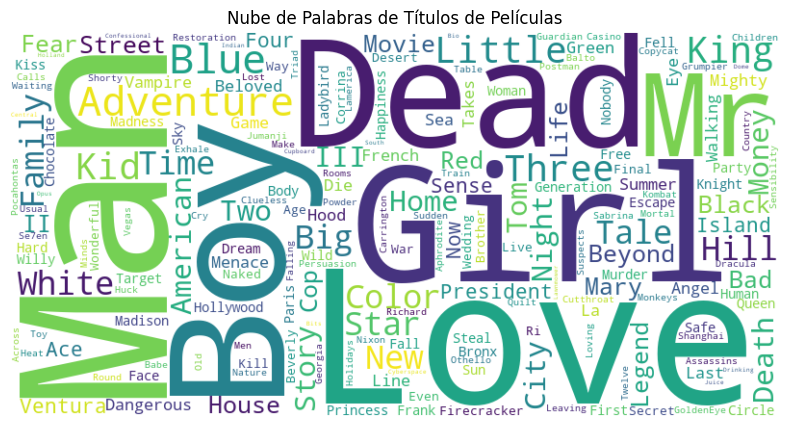

In [66]:
# Generar la nube de palabras con los títulos de df_recomendacion
text = " ".join(df_recomendacion['title'].fillna('').tolist())
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Nube de Palabras de Títulos de Películas")
plt.show()

In [ ]:
df_recomendacion

,title,popularity
0,Toy Story,21.946943
1,Jumanji,17.015539
2,Grumpier Old Men,11.712900
3,Waiting to Exhale,3.859495
5,Heat,17.924927
...,...,...
495,Mrs. Doubtfire,11.165530
496,Naked,8.665198
497,The Next Karate Kid,9.969700
498,The New Age,0.596207


### *Sistema de recomendacion* ###

-*Preparacion de los datos*

- *Se crea el df_recomendacion para el sistema de recomendacion*

In [387]:
df_recomendacion= df_movies[['title', 'popularity']]

- *Se utilizan las columnas titulo y popularidad*
- *Se corroboran los valores nulos y si los hay se sustituyen por ' y 0 respectivamente*

In [388]:
df_recomendacion['title'] = df_recomendacion['title'].fillna('')
df_recomendacion['popularity'] = df_recomendacion['popularity'].fillna(0)

*Normalizacion de popularidad para poder combinar las similitudes*

In [389]:
df_recomendacion['popularidad'] = (
    df_recomendacion['popularity'] - df_recomendacion['popularity'].min()
) / (df_recomendacion['popularity'].max() - df_recomendacion['popularity'].min())

*Se convierte a minuscula los titulos del dataset*

In [390]:
df_recomendacion['titulos'] = df_recomendacion['title'].str.lower()


In [391]:
df_recomendacion = df_recomendacion.drop(['title', 'popularity'], axis=1)

In [392]:
df_recomendacion

,popularidad,titulos
0,0.155700,toy story
1,0.120713,jumanji
2,0.083092,grumpier old men
3,0.027374,waiting to exhale
5,0.127165,heat
...,...,...
495,0.079208,mrs. doubtfire
496,0.061469,naked
497,0.070724,the next karate kid
498,0.004222,the new age


*Importacion del df_recomendacion en formato csv bajo el nombre de dataset_recomendacion.csv'*

In [399]:
df_recomendacion.to_csv('dataset_recomendacion.csv', index=False)

- *Se crea un vectorizador TF-IDF para calcular la  similitud de los titulos*

In [393]:
vec_tfidf = TfidfVectorizer(stop_words='english')
matriz_tfidf = vec_tfidf.fit_transform(df_recomendacion['titulos'])

- *Se calcula la matriz de la similitud del coseno para los titulos*

In [357]:
similitud_coseno = cosine_similarity(matriz_tfidf, matriz_tfidf)

- *Se crea una serie para mapear títulos a índices, si hay duplicados se eliminan*

In [394]:
indices = pd.Series(df_recomendacion.index, index=df_recomendacion['titulos']).drop_duplicates()

- *Funcion de recomendacion*
- *Convierte el titulo pasado como parametro en minuscula*
- *Si el titulo no existe en los datos retorna un mensaje de error*
- *Se obtiene el indice de la pelicula*
- *Se crea la variable sim_score y en ella se alojan las similitudes entre los titulos en formato lista*
- *Se ordenan 10 películas por su puntuación de similitud de títulos excluyendo la pelicula original*
- *Se crea una métrica combinada basada en popularidad y similitudy se ordenan*
- *Se extraen los titulos de las peliculas recomendadas*
- *Finalemte retorna las recomendaciones*

In [400]:
def recomendacion(titulo: str):
    """
    Recibe el título de una película y devuelve una lista de 5 películas similares.
    """
    titulo = titulo.lower()
    if titulo not in indices:
        return {"error": "El título ingresado no se encuentra en la base de datos."}

    idx = indices[titulo]
    # Calcula las similitudes de los títulos
    sim_scores = list(enumerate(similitud_coseno[idx]))
    
    # Ordenar las películas por su puntuación de similitud de títulos
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    # Excluir la película original y limitar a las 10 más similares
    sim_scores = sim_scores[1:11]
    
    # Crear una métrica combinada basada en popularidad y similitud
    recomendaciones = []
    for i, sim in sim_scores:
        score = sim * 0.7 + df_recomendacion.iloc[i]['popularidad'] * 0.3
        recomendaciones.append((df_recomendacion.iloc[i]['titulos'], score))
    
    recomendaciones = sorted(recomendaciones, key=lambda x: x[1], reverse=True)[:5]
    
    # Extraer los títulos de las películas recomendadas
    recomendacion_titulos = [r[0] for r in recomendaciones]
    
    return {"recomendaciones": recomendacion_titulos}



In [ ]:
recomendada = input("Ingresa el título de una filmación: ")
resultado = recomendacion(titulo)
print(resultado)

{'recomendaciones': ["a pyromaniac's love story", 'the neverending story iii: escape from fantasia', 'heat', 'jumanji', 'goldeneye']}
